# Dataset Analysis

In [1]:
import datasets 
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()
df.describe()

Using custom data configuration ucberkeley-dlab--measuring-hate-speech-1d47093687320b66
Reusing dataset parquet (C:\Users\Usuario\.cache\huggingface\datasets\ucberkeley-dlab___parquet\ucberkeley-dlab--measuring-hate-speech-1d47093687320b66\0.0.0\7328ef7ee03eaf3f86ae40594d46a1cec86161704e02dd19f232d81eee72ade8)


  0%|          | 0/1 [00:00<?, ?it/s]

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [2]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [3]:
df.shape

(135556, 131)

In [4]:
df.columns

Index(['comment_id', 'annotator_id', 'platform', 'sentiment', 'respect',
       'insult', 'humiliate', 'status', 'dehumanize', 'violence',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=131)

array([[<AxesSubplot:title={'center':'sentiment'}>]], dtype=object)

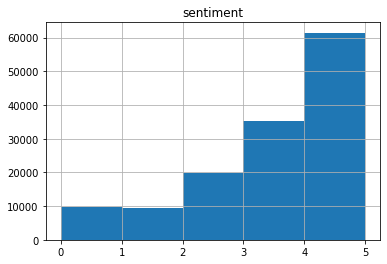

In [5]:
df.hist(column='sentiment', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'respect'}>]], dtype=object)

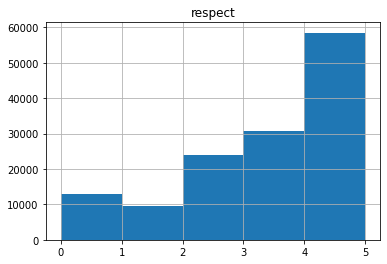

In [6]:
df.hist(column='respect', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'insult'}>]], dtype=object)

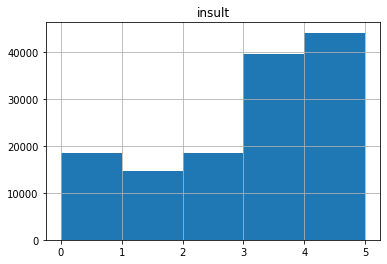

In [7]:
df.hist(column='insult', bins=[0,1,2,3,4,5])

array([[<AxesSubplot:title={'center':'hatespeech'}>]], dtype=object)

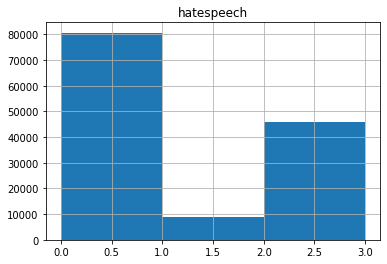

In [8]:
df.hist(column='hatespeech', bins=[0,1,2,3])

array([[<AxesSubplot:title={'center':'hate_speech_score'}>]], dtype=object)

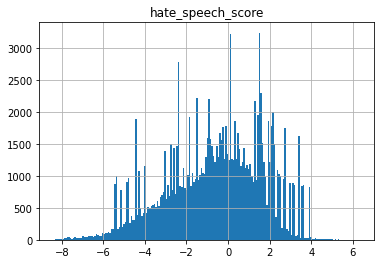

In [9]:
df.hist(column='hate_speech_score', bins=200)

In [10]:
sample = df.loc[df['hatespeech'].isin([0,1,2]), ['text','hatespeech', 'hate_speech_score']].sample(10)
for text in sample.values:
    print(text)

['JUST IN: U.S. plans to start raids on Sunday targeting at least 2,000 undocumented immigrants who have been ordered deported, New York Times reports.  * Raids to be conducted by ICE over multiple days * Expected to take place across 10 major cities  URL'
 0.0 -1.69]
["happy pride month i'm gay URL" 0.0 -4.3]
['I hate a cocky female, bitch calm down before I cheat on you with an ugly bitch'
 2.0 1.1]
['Just check my feed I have the true N-Word pass' 1.0 -1.95]
['Niggers and their liberal friends steal everything not tied down, just like the presidency here with acorn with its liberal defenders, FUCK YOU NIGGER OBOAMA!'
 2.0 1.93]
['Looks like the only safe option for illegals is... do not step one foot out of those sanctuary cities. At some point, (when things get bad enough) the people living in these sanctuary cities will either turn the illegals over to ICE, or they will take matters into their own hands, and eliminate them altogether.'
 0.0 0.15]
['Trans culture is seeing that and

In [11]:
print('hatespeech max:', df.hatespeech.max())
print('hatespeech min:', df.hatespeech.min())
print('hate_speech_score max:', df.hate_speech_score.max())
print('hate_speech_score min:', df.hate_speech_score.min())

hatespeech max: 2.0
hatespeech min: 0.0
hate_speech_score max: 6.3
hate_speech_score min: -8.34
